In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Clustering

#### 1. Dada la siguiente tabla de datos
x = [-1, 0, 1, 8/5, 2, 3, 4]

y = [2, 1, 2, 2, 1, 2, 1]

Utilizar “a mano” el m´etodo de k-medias para agrupar los datos en 2 clusters.

(a) Comenzando con b1 = (1, 2) y b2 = (3, 2)

(b) Comenzando con b1 = (0, 1) y b2 = (3, 2)

¿Se obtiene la misma clasificaci´on? ¿Alguna de las clasificaciones obtenidas le parece m´as
apropiada?


## Pasos del algoritmo k-means:

### Asignación:
Asignar cada punto de datos al clúster cuyo centroide (medida) está más cercano.

### Actualización:
Calcular la nueva posición de los centroides como la media de todos los puntos asignados a ese clúster.

### Repetir los pasos de asignación y actualización hasta que los centroides no cambien (o cambien muy poco).

## Datos:

| x    | -1    | 0     | 1    | 8/5   | 2    | 3    | 4    |
|------|-------|-------|------|-------|------|------|------|
| y    | 2     | 1     | 2    | 2     | 1    | 2    | 1    |

### Conjunto (a):
**Centroides iniciales:**

- 𝑏1 = (1, 2)
- 𝑏2 = (3, 2)

**Iteración 1:**

**Asignación:**

- Punto (-1, 2) está más cerca de 𝑏1.
- Punto (0, 1) está más cerca de 𝑏1.
- Punto (1, 2) está más cerca de 𝑏1.
- Punto (8/5, 2) está más cerca de 𝑏1.
- Punto (2, 1) está más cerca de 𝑏2.
- Punto (3, 2) está más cerca de 𝑏2.
- Punto (4, 1) está más cerca de 𝑏2.

**Actualización:**

Nuevo 𝑏1: (5/8, 1.75)
Nuevo 𝑏2: (3, 1.33)

### Conjunto (b):
**Centroides iniciales:**

- 𝑏1 = (0, 1)
- 𝑏2 = (3, 2)

**Iteración 1:**

**Asignación:**

- Punto (-1, 2) está más cerca de 𝑏1.
- Punto (0, 1) está más cerca de 𝑏1.
- Punto (1, 2) está más cerca de 𝑏1.
- Punto (8/5, 2) está más cerca de 𝑏1.
- Punto (2, 1) está más cerca de 𝑏2.
- Punto (3, 2) está más cerca de 𝑏2.
- Punto (4, 1) está más cerca de 𝑏2.

**Actualización:**

Nuevo 𝑏1: (5/8, 1.75)
Nuevo 𝑏2: (3, 1.33)

## Conclusión:

En ambas inicializaciones, después de una iteración de k-means, obtenemos los mismos nuevos centroides. Esto sugiere que las clasificaciones convergen a una solución similar independientemente de los puntos iniciales dados. Por lo tanto, ambas inicializaciones dan lugar a la misma clasificación final, y ninguna de las clasificaciones obtenidas parece más apropiada que la otra, ya que convergen a la misma solución.


#### 2. Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados

(a) Abra cada dataset en Python y genere un diagrama de dispersi´on (scatter plot) para cada
uno.

In [4]:
data1 = pd.read_csv('./Datos/p7-data1.csv')
data2 = pd.read_csv('./Datos/p7-data2.csv')

(b) Analizando los gr´aficos “a mano” considere cu´antos clusters est´an presentes.

'Consideraría como 14 (a "ojo") para data1 y 2 clusters para data2'

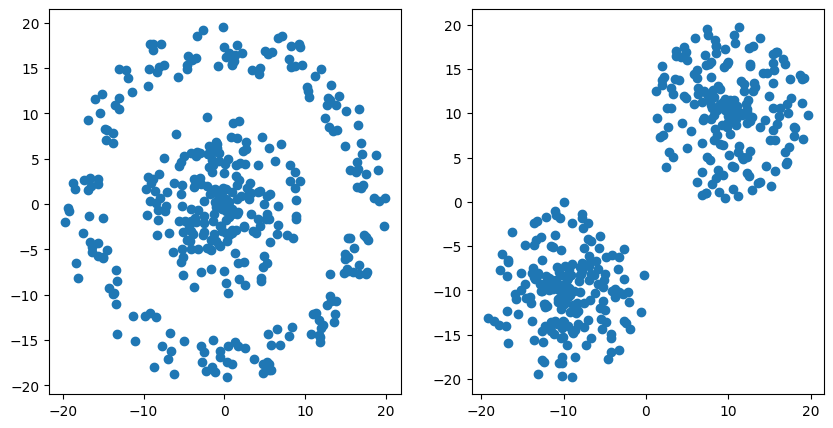

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(data1.x,data1.y)
ax2.scatter(data2.x,data2.y)
"""Consideraría como 14 (a "ojo") para data1 y 2 clusters para data2"""

(c) Pruebe ejecutar el comando KMeans con la cantidad de clusters que detect´o. Analizar el
comportamiento del procedimiento en cada caso.

In [6]:
kmeans = KMeans(n_clusters=14)   # Creamos el objeto de la clase KMeans pero no hacemos nada todavía
# Asignamos cada observación a un cluster
etiquetas = kmeans.fit_predict(data1)
centros = kmeans.cluster_centers_

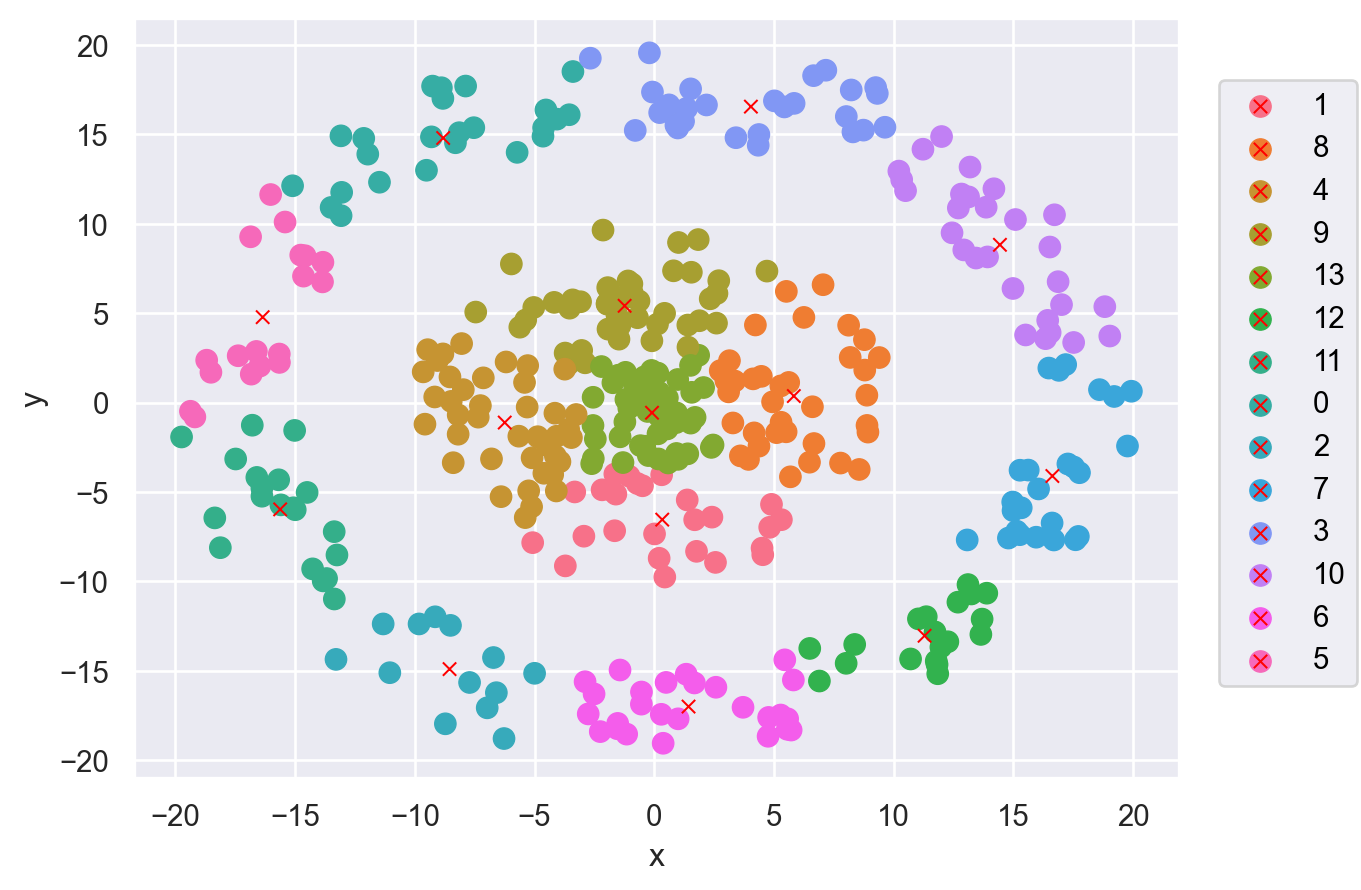

In [7]:
(
    so.Plot(x = data1.x, y =  data1.y, color = etiquetas.astype(str))
    .add(so.Dot(pointsize = 8))
    .add(so.Dot(color='red', pointsize=5, marker='x'), x=centros[:, 0], y=centros[:, 1])
    
)
# """ Fua, le pegué bastante bien, pero hay un dato en -5,-10 que no se eligio bien"""

#### 3. Considerar el dataset p7-iris.txt (para leer el archivo, observar que los datos est´an separados por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.


(a) Cargue el archivo p7-iris.txt.

In [8]:
petalos= pd.read_csv('./Datos/p7-iris.txt',sep="\t")
petalos.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(b) Grafique en un diagrama de dispersi´on la longitud del p´etalo vs el ancho del p´etalo.

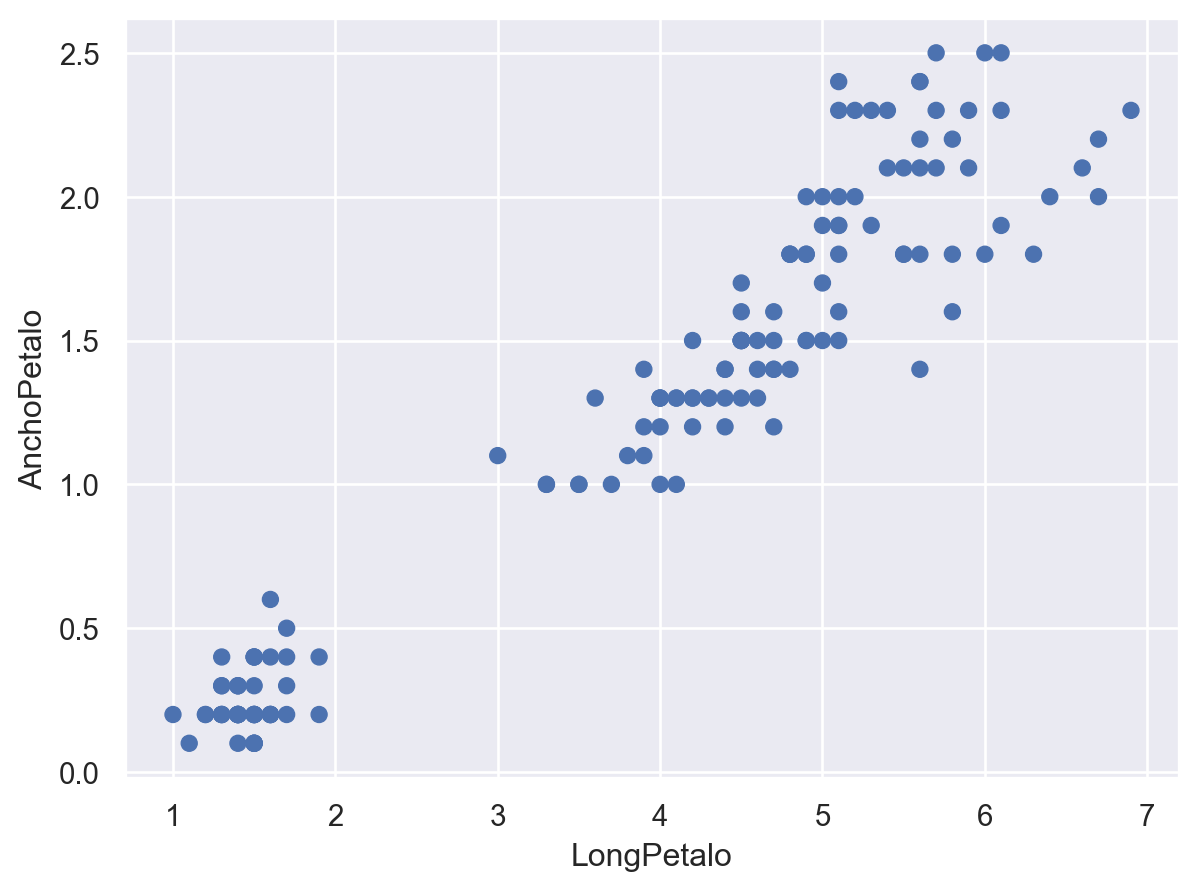

In [9]:
(
    so.Plot(data=petalos, x='LongPetalo',y='AnchoPetalo')
    .add(so.Dot())
)

(c) Efect´ue un clustering k-medias con el comando KMeans de los datos basados en las cuatro
columnas de datos, considere k = 3 clusters.


In [10]:
# Crear el modelo k-means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
# Ajustar el modelo
kmeans.fit(petalos)

# Obtener los índices de los clusters
petalos['Cluster'] = kmeans.labels_

petalos.head()


,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


(d) Repita el inciso b) coloreando en funci´on del ´ındice de cluster obtenido.

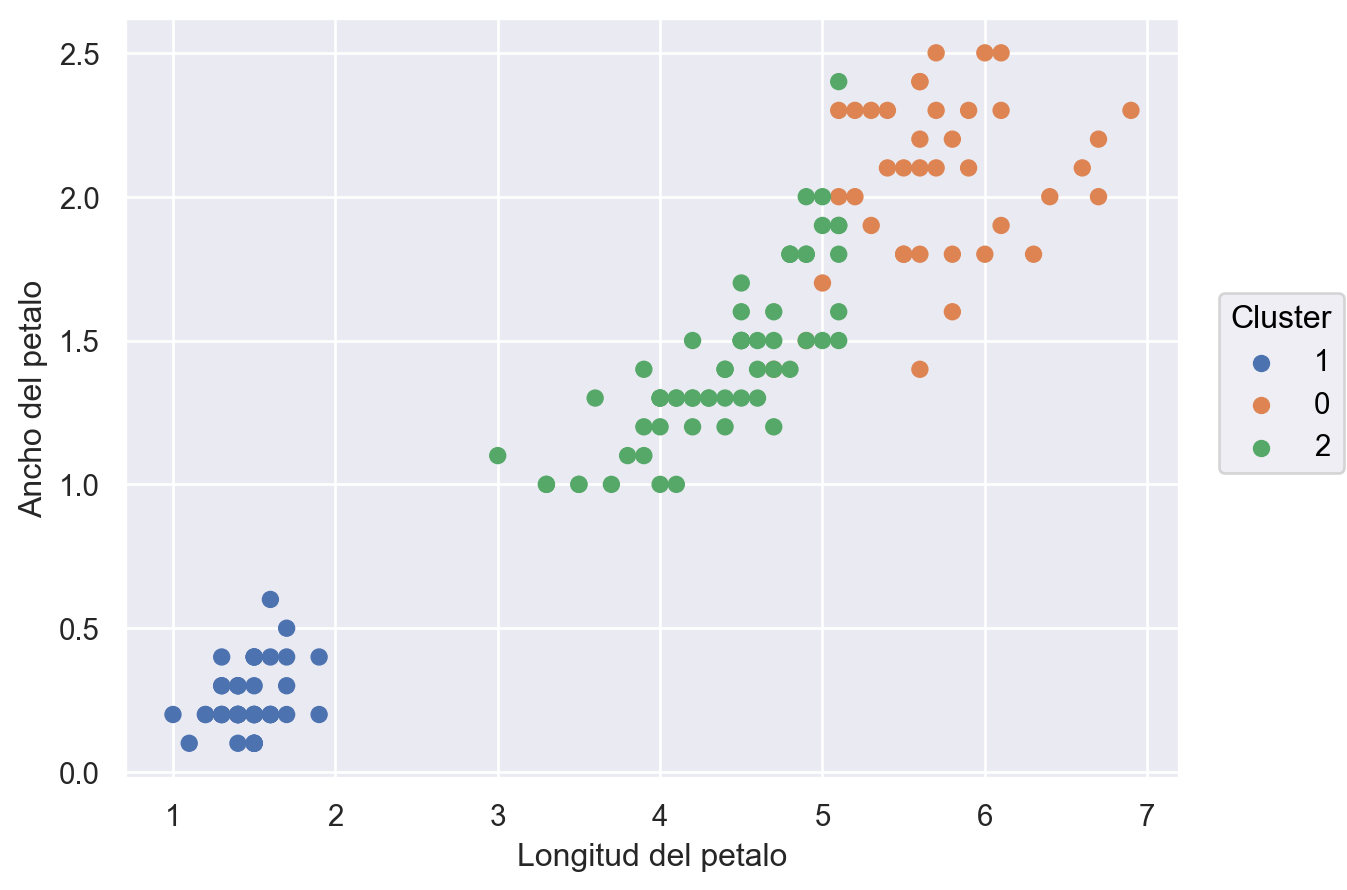

In [11]:
# Graficar longitud del pétalo vs ancho del pétalo coloreado por cluster
(
    so.Plot(petalos['LongPetalo'], petalos['AnchoPetalo'], color=petalos.Cluster.astype("str"))
    .add(so.Dot())
    .label(x = 'Longitud del petalo', y= 'Ancho del petalo')
)

# plt.scatter(petalos['LongPetalo'], petalos['AnchoPetalo'], c=petalos['Cluster'])
# plt.xlabel('Longitud del Pétalo')
# plt.ylabel('Ancho del Pétalo')
# plt.title('Diagrama de Dispersión: Longitud del Pétalo vs Ancho del Pétalo (Coloreado por Cluster)')
# plt.colorbar(label='Cluster')
# plt.show()

(e) Eval´ue el error de clustering en funci´on de la siguiente f´ormula (within-cluster sum of
squares, WCSS):
W CSS =
X
k
i=
X
x∈Ci
kx − µik
2
donde Ci representa el cluster i-´esimo y µi es el centroide de dicho cluster, definido como
µi =
1
#Ci
X
x∈Ci
x.
Python ofrece una forma de calcular esto de forma directa.
(Mirar el archivo p7-ejercicioPetalos.ipynb.)

(f) Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el W CSS para cada
valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre
“complejidad” (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).

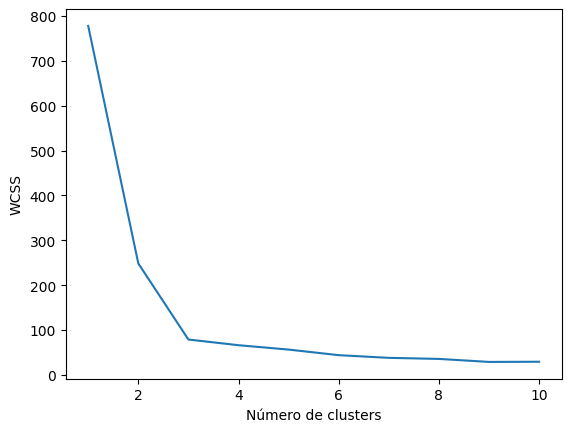

3 seria lo optimo, por el codo


In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(petalos)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()
print('3 seria lo optimo, por el codo')

#### 4. Consideremos el dataset de datos artificiales p7-dataSinEscalar.csv.

(a) Cargar los datos y graf´ıcarlos.

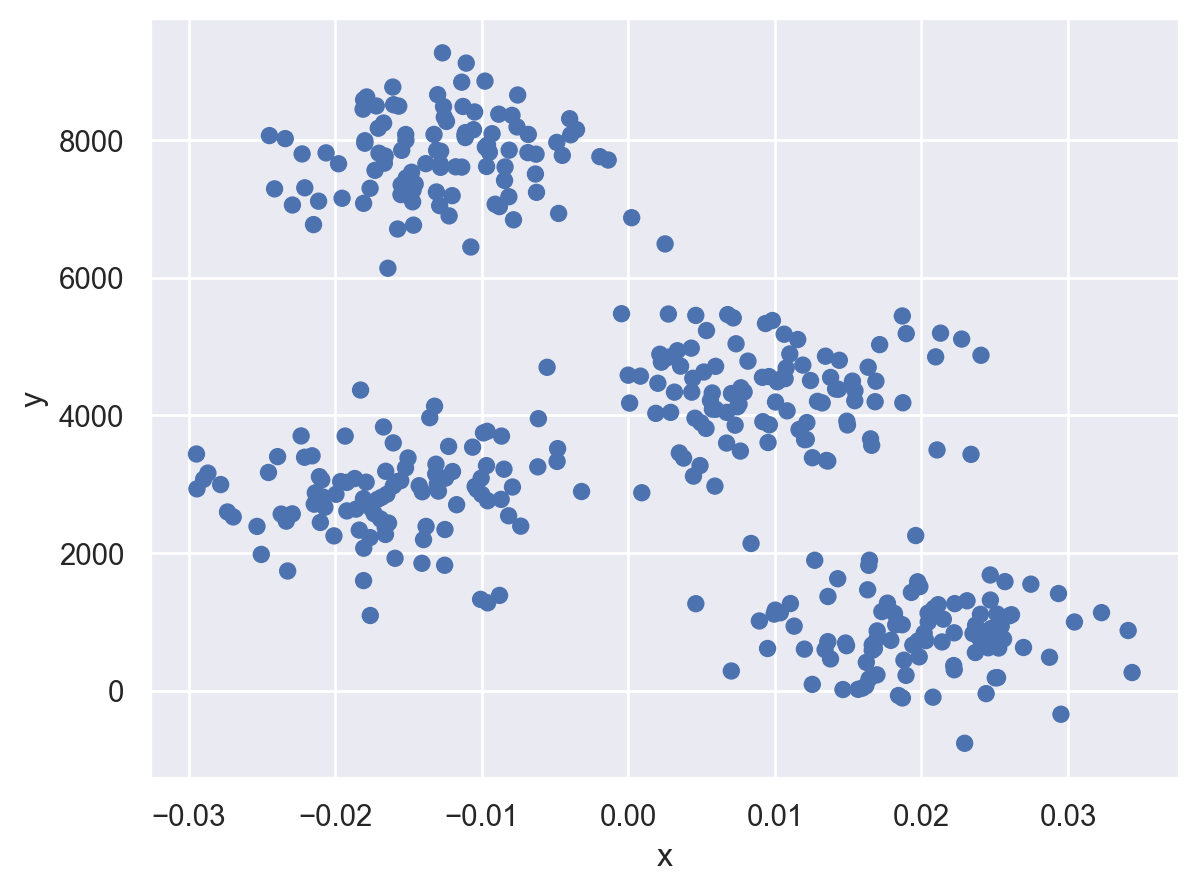

In [13]:
dataSE= pd.read_csv('./Datos/p7-dataSinEscalar.csv')
dataSE.columns
dataSE = dataSE.rename(columns={' y':'y'}) ## venia roto

(
    so.Plot(data=dataSE, x=dataSE.x ,y = dataSE.y)
    .add(so.Dot())
)

(b) A priori y mirando el gr´afico, determine la cantidad de clusters que puede detectar en los
mismos e imagine inicialmente c´omo debieran ser esos clusters.

In [14]:
#Me imagino 4 clusters "grandes" con centros aprox en ([-0.01,8000], [0.01, 4000], [-0.022, 3000], [0.02, 1000])

(c) Realizar un clustering k-medias con el valor de k antes determinado.

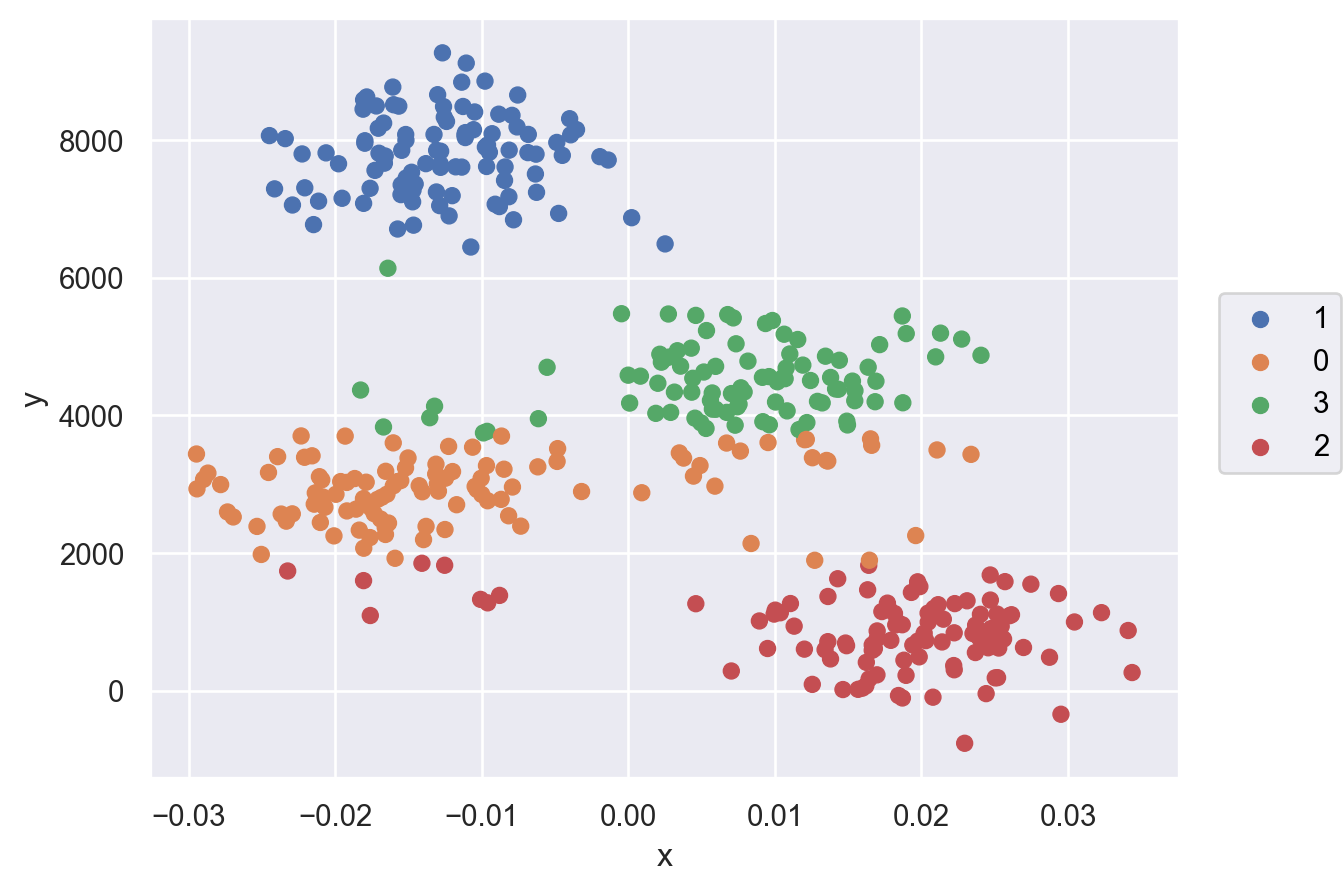

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dataSE)

centros = kmeans.cluster_centers_

(
    so.Plot(data=dataSE, x = dataSE.x,y=dataSE.y, color=kmeans.labels_.astype('str'))
    .add(so.Dot())
    
)

(d) ¿Considera satisfactorio el clustering obtenido? ¿Representa lo que usted esperaba?

In [16]:
# Si en cantidad, no en agrupamiento

(e) Uno de los problemas que tenemos es que el m´etodo de k-medias es muy sensible a las
diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las
variables de forma tal que todas se muevan en el mismo

De esta manera, logramos que los datos de cada columna caigan entre 0 y 1. Normalice
los datos siguiendo este criterio.
(Mirar en Python el comando MinMaxScaler)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler().set_output(transform="pandas")

dataSEScaled = scaler.fit_transform(dataSE)



(f) Vuelva a correr el procedimiento de clustering, tome las etiquetas de clustering obtenidos
y grafique los datos originales con un color que dependa del clustering obtenido con los
datos escalados.


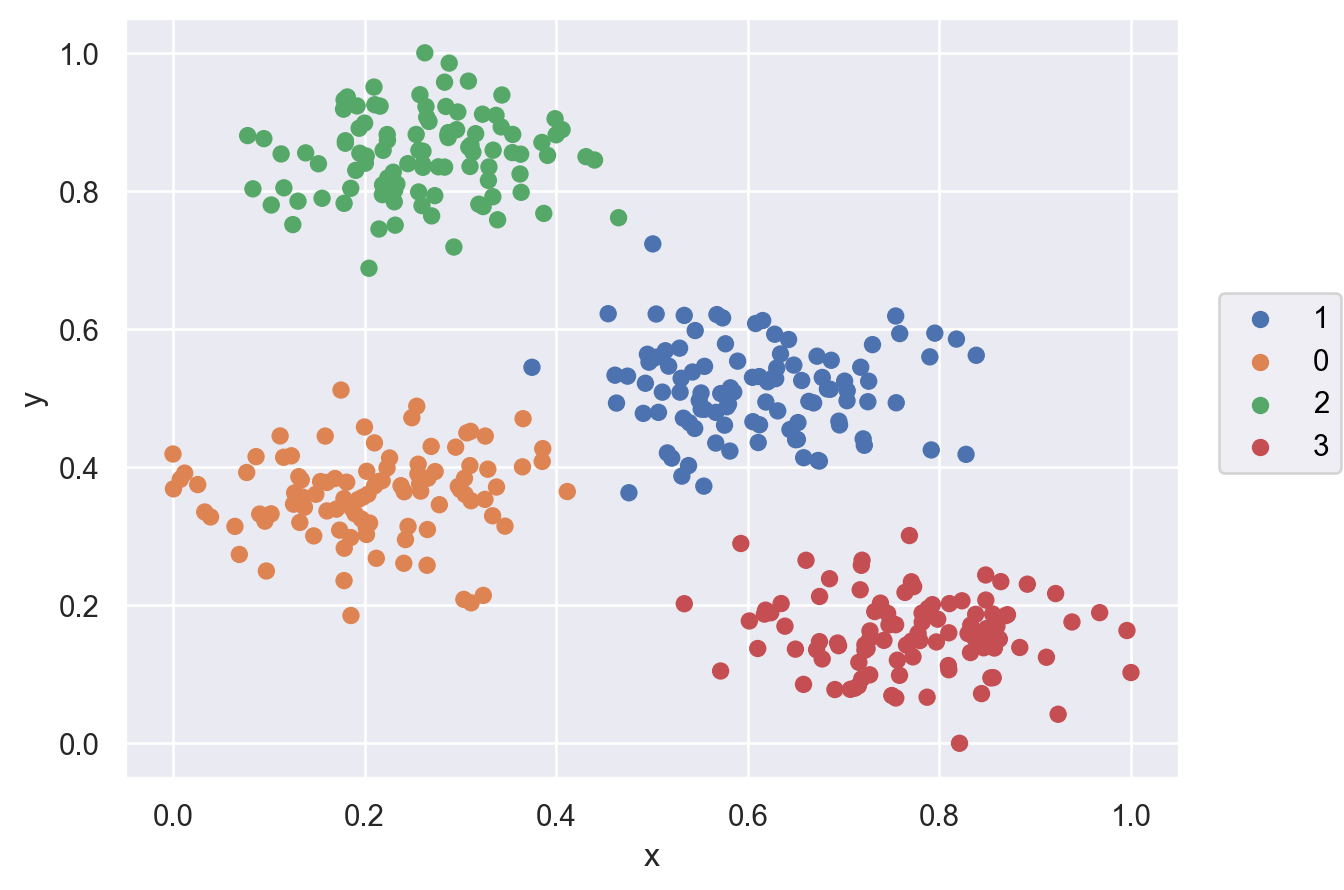

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dataSEScaled)

centros = kmeans.cluster_centers_

(
    so.Plot(data=dataSEScaled, x = dataSEScaled.x,y=dataSEScaled.y, color=kmeans.labels_.astype('str'))
    .add(so.Dot())
    
)

#### 5. (opcional) Implementar el algoritmo DBSCAN para analizar los sets de datos anteriores. Comparar los resultados con los obtenidos usando k-medias.

In [19]:
### Clasificación

6. Implementar un clasificador de k-NN que prediga el sexo de los ping¨uinos utilizando como
variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares)
y evaluar el error de predicci´on en cada caso. ¿C´omo elegir´ıa el valor de k ´optimo?

In [20]:
pinguins_df = sns.load_dataset ("penguins")
pinguins_df = pinguins_df.dropna() 
pinguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [21]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# 2. Separamos la variable respuesta
X = pinguins_df[['bill_length_mm']]
y = pinguins_df['flipper_length_mm']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalamos X
X = MinMaxScaler().set_output(transform="pandas").fit_transform(X)

neighbor = KNeighborsClassifier(n_neighbors=5)

# Entrenamos utilizando X_train
neighbor.fit(X_train,y_train)

# Predecimos utilizando X_test
y_pred = neighbor.predict(X_test)

# Repetimos todo para varios valores de K
for K in range(3,5,7,9,11,13,15):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train,y_train)
    y_pred = neighbor.predict(X_test)
    print(K, accuracy_score(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [266, 67]